### 1. Setup & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

df = pd.read_csv("comprehensive_pollution_vehicle_dataset.csv")

# Quick look
print("Shape:", df.shape)
print(df.head())

# Info & summary
df.info()
print("\nStatistical Summary:\n", df.describe(include="all"))

Shape: (600, 15)
     Country    Region Economic_Region  Year  PM25_Concentration Vehicle_Make  \
0  Argentina  Americas   South_America  2010              12.920   VOLKSWAGEN   
1  Argentina  Americas   South_America  2010              12.920         FORD   
2  Argentina  Americas   South_America  2010              12.920       TOYOTA   
3  Argentina  Americas   South_America  2011              12.998         FORD   
4  Argentina  Americas   South_America  2011              12.998         FORD   

             Vehicle_Class  Avg_CO2_Emissions  Avg_Fuel_Consumption  \
0           SUV - STANDARD         281.000000             11.300000   
1  PICKUP TRUCK - STANDARD         317.478261             15.769565   
2    STATION WAGON - SMALL         192.500000              8.350000   
3               SUBCOMPACT         224.600000              9.760000   
4              SUV - SMALL         234.222222             10.188889   

   Avg_Engine_Size  Estimated_Market_Share  Pollution_Impact_Score  \

## 2. Data Cleaning

In [2]:
# Check missing values
print("\nMissing values:\n", df.isnull().sum())

# Drop duplicates if any
print("\nDuplicates:", df.duplicated().sum())
df = df.drop_duplicates()
df = df.dropna()   # or impute if needed


Missing values:
 Country                   0
Region                    0
Economic_Region           0
Year                      0
PM25_Concentration        0
Vehicle_Make              0
Vehicle_Class             0
Avg_CO2_Emissions         0
Avg_Fuel_Consumption      0
Avg_Engine_Size           0
Estimated_Market_Share    0
Pollution_Impact_Score    0
PM25_Category             0
CO2_Category              0
Engine_Size_Category      0
dtype: int64

Duplicates: 0


### 3. Univariate Analysis

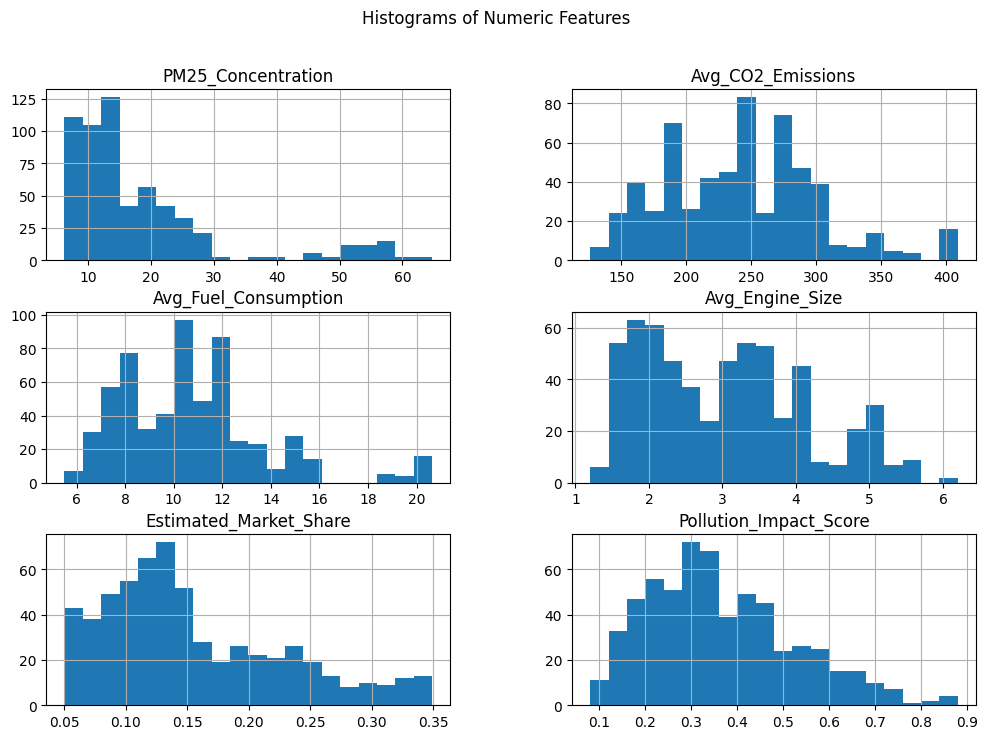

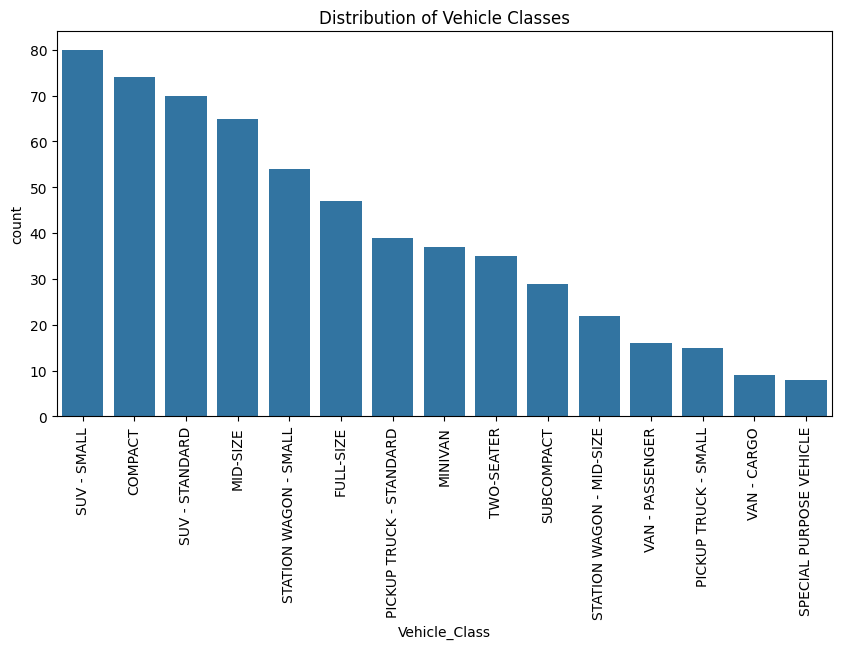

In [3]:
# Histograms for numeric variables
numeric_cols = ["PM25_Concentration", "Avg_CO2_Emissions", "Avg_Fuel_Consumption",
                "Avg_Engine_Size", "Estimated_Market_Share", "Pollution_Impact_Score"]

df[numeric_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Histograms of Numeric Features")
plt.show()

# Countplot for Vehicle Class
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Vehicle_Class", order=df["Vehicle_Class"].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Vehicle Classes")
plt.show()

### 4. Normalisation and Encoding

In [5]:
# Normalization (Min-Max Scaling)
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

print("\nFirst 5 rows after normalization:\n", df_scaled[numeric_cols].head())

# Encoding Categorical Variables
df_encoded = df_scaled.copy()
cat_cols = ["Country", "Region", "Economic_Region", "Vehicle_Make", "Vehicle_Class",
            "PM25_Category", "CO2_Category", "Engine_Size_Category"]

encoder = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])

print("\nFirst 5 rows after categorical encoding:\n", df_encoded.head())


First 5 rows after normalization:
    PM25_Concentration  Avg_CO2_Emissions  Avg_Fuel_Consumption  \
0            0.115119           0.547703              0.383091   
1            0.115119           0.676602              0.678307   
2            0.115119           0.234982              0.188243   
3            0.116451           0.348410              0.281374   
4            0.116451           0.382411              0.309702   

   Avg_Engine_Size  Estimated_Market_Share  Pollution_Impact_Score  
0         0.420000                0.214047                  0.3000  
1         0.648696                0.207358                  0.3500  
2         0.120000                0.127090                  0.1125  
3         0.414000                0.324415                  0.3125  
4         0.257778                0.555184                  0.5375  

First 5 rows after categorical encoding:
    Country  Region  Economic_Region  Year  PM25_Concentration  Vehicle_Make  \
0        0       0             

### 5. Correlation & Bivariate Analysis

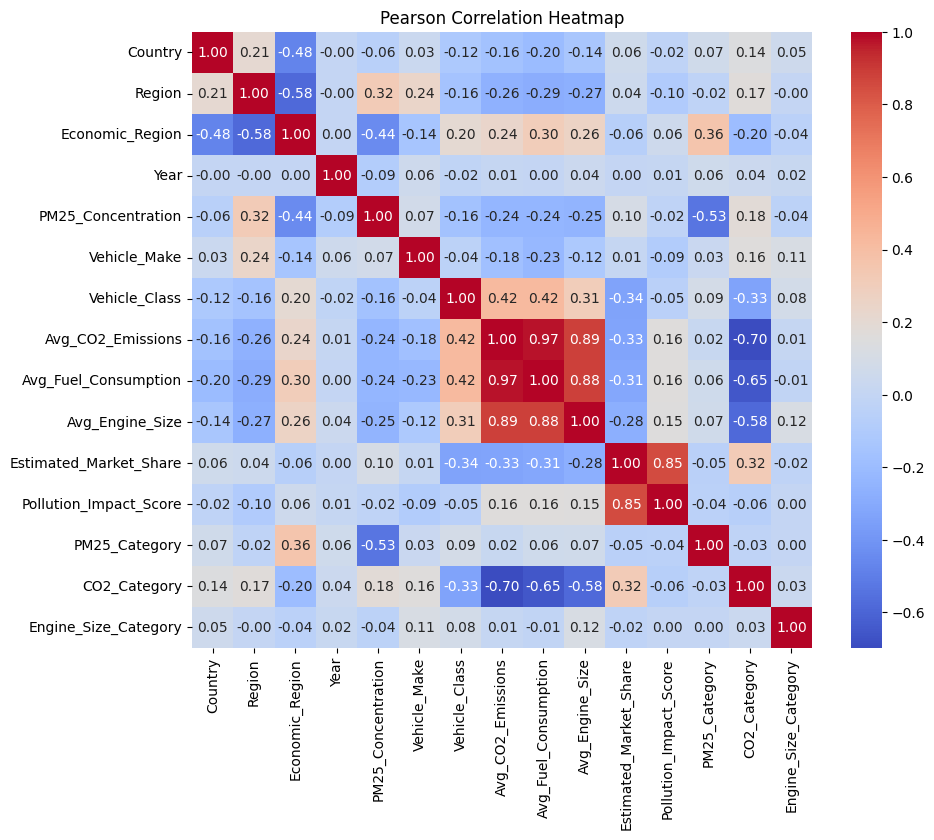


Pearson correlation (CO2 vs PM2.5): -0.239
Pearson correlation (Fuel Consumption vs PM2.5): -0.239


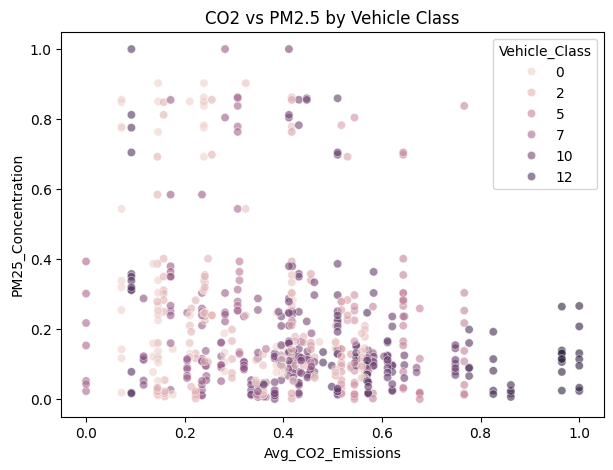

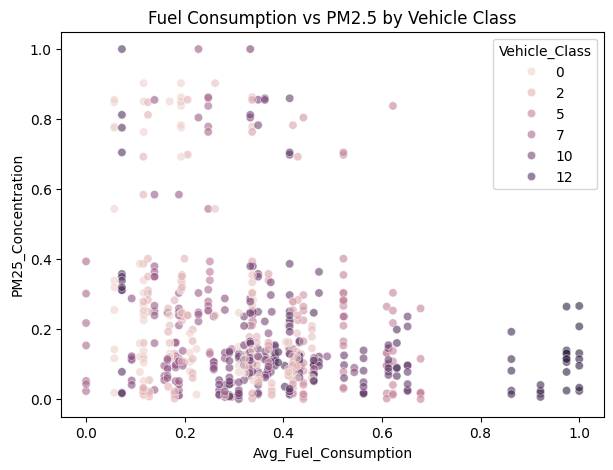

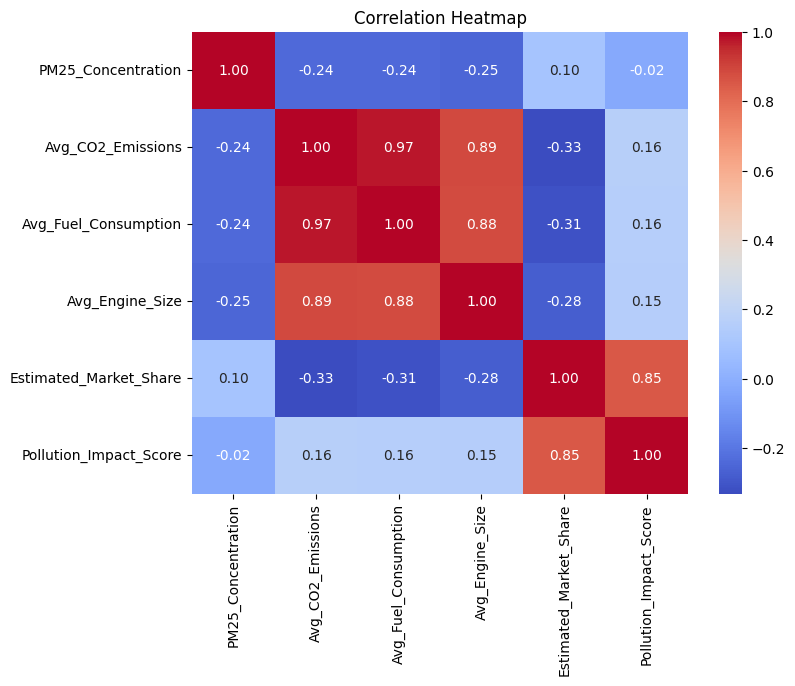

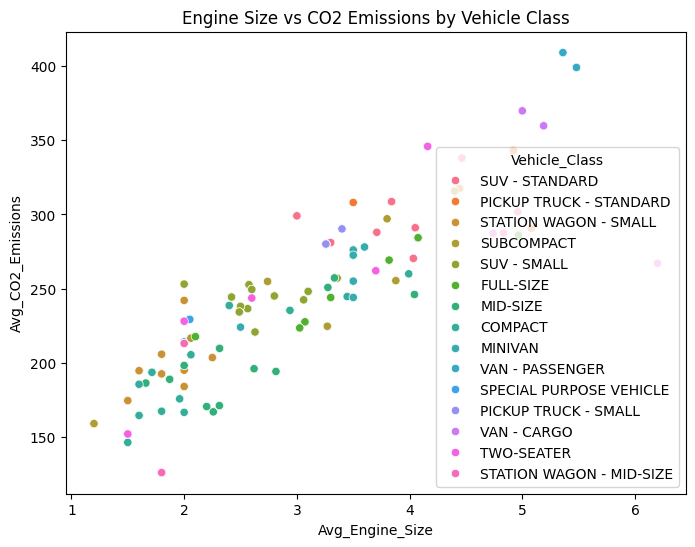

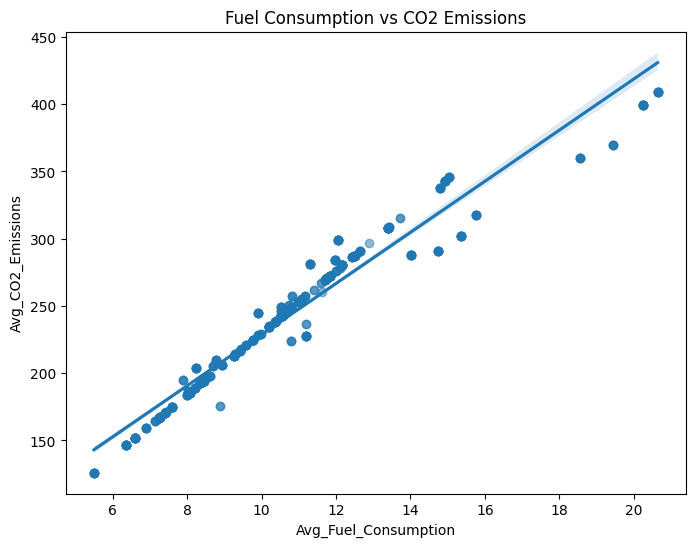

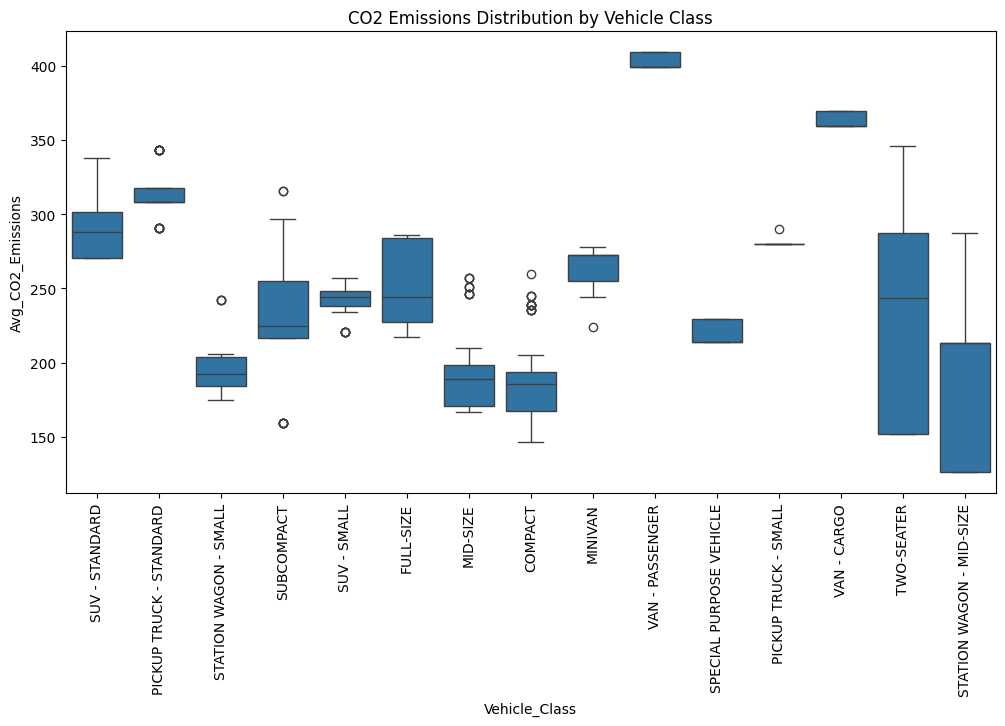

In [6]:
# Pearson correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

# Specific correlation check: traffic vs AQI
if "Avg_CO2_Emissions" in df_encoded.columns and "PM25_Concentration" in df_encoded.columns:
    corr = df_encoded["Avg_CO2_Emissions"].corr(df_encoded["PM25_Concentration"], method="pearson")
    print(f"\nPearson correlation (CO2 vs PM2.5): {corr:.3f}")

if "Avg_Fuel_Consumption" in df_encoded.columns and "PM25_Concentration" in df_encoded.columns:
    corr = df_encoded["Avg_Fuel_Consumption"].corr(df_encoded["PM25_Concentration"], method="pearson")
    print(f"Pearson correlation (Fuel Consumption vs PM2.5): {corr:.3f}")

# Scatterplot: CO2 vs PM2.5
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_encoded, x="Avg_CO2_Emissions", y="PM25_Concentration", hue="Vehicle_Class", alpha=0.6)
plt.title("CO2 vs PM2.5 by Vehicle Class")
plt.show()

# Scatterplot: Fuel Consumption vs PM2.5
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_encoded, x="Avg_Fuel_Consumption", y="PM25_Concentration", hue="Vehicle_Class", alpha=0.6)
plt.title("Fuel Consumption vs PM2.5 by Vehicle Class")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Scatter: Engine size vs CO2 emissions
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Avg_Engine_Size", y="Avg_CO2_Emissions", hue="Vehicle_Class")
plt.title("Engine Size vs CO2 Emissions by Vehicle Class")
plt.show()

# Fuel consumption vs CO2 emissions (regression plot)
plt.figure(figsize=(8,6))
sns.regplot(data=df, x="Avg_Fuel_Consumption", y="Avg_CO2_Emissions", scatter_kws={'alpha':0.5})
plt.title("Fuel Consumption vs CO2 Emissions")
plt.show()

# Boxplot: CO2 emissions across vehicle classes
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Vehicle_Class", y="Avg_CO2_Emissions")
plt.xticks(rotation=90)
plt.title("CO2 Emissions Distribution by Vehicle Class")
plt.show()

### 6. Correlation Matrix

In [30]:
# Correlation Matrix (Numeric Only)
corr_matrix = df[numeric_cols].corr(method="pearson")
print("Correlation Matrix (Numeric Features Only):\n")
print(corr_matrix.round(2))

# Top Correlated Pairs
# Unstack correlation matrix & filter duplicates/self-correlations
corr_pairs = corr_matrix.unstack().reset_index()
corr_pairs.columns = ["Feature_1", "Feature_2", "Correlation"]

# Remove self correlations & duplicate pairs
corr_pairs = corr_pairs[corr_pairs["Feature_1"] < corr_pairs["Feature_2"]]

# Sort by absolute correlation
top_corr = corr_pairs.reindex(corr_pairs["Correlation"].abs().sort_values(ascending=False).index)

print("\nTop Correlated Feature Pairs:\n")
print(top_corr.head(10).to_string(index=False))


Correlation Matrix (Numeric Features Only):

                        PM25_Concentration  Avg_CO2_Emissions  \
PM25_Concentration                    1.00              -0.24   
Avg_CO2_Emissions                    -0.24               1.00   
Avg_Fuel_Consumption                 -0.24               0.97   
Avg_Engine_Size                      -0.25               0.89   
Estimated_Market_Share                0.10              -0.33   
Pollution_Impact_Score               -0.02               0.16   

                        Avg_Fuel_Consumption  Avg_Engine_Size  \
PM25_Concentration                     -0.24            -0.25   
Avg_CO2_Emissions                       0.97             0.89   
Avg_Fuel_Consumption                    1.00             0.88   
Avg_Engine_Size                         0.88             1.00   
Estimated_Market_Share                 -0.31            -0.28   
Pollution_Impact_Score                  0.16             0.15   

                        Estimated_Market_Sh

### 7. Time Series Trends

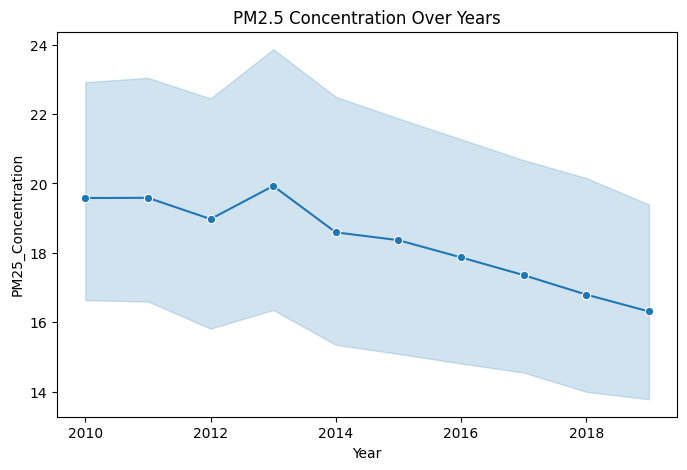

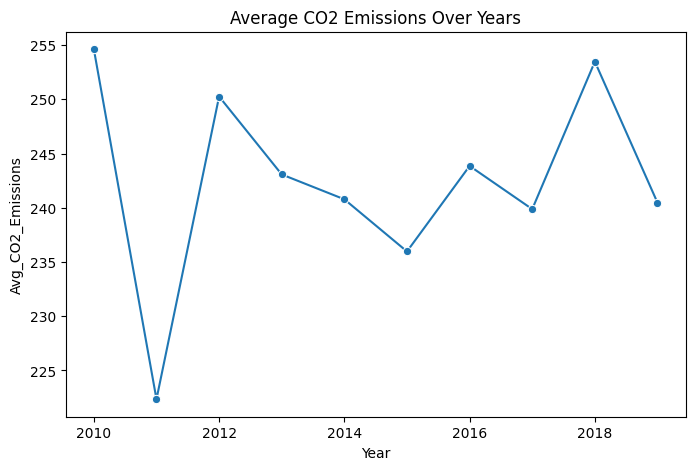

In [31]:
# PM2.5 concentration over years
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x="Year", y="PM25_Concentration", marker="o")
plt.title("PM2.5 Concentration Over Years")
plt.show()

# Average CO2 emissions per year
co2_trend = df.groupby("Year")["Avg_CO2_Emissions"].mean().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(data=co2_trend, x="Year", y="Avg_CO2_Emissions", marker="o")
plt.title("Average CO2 Emissions Over Years")
plt.show()

### 8. Category-based Analysis

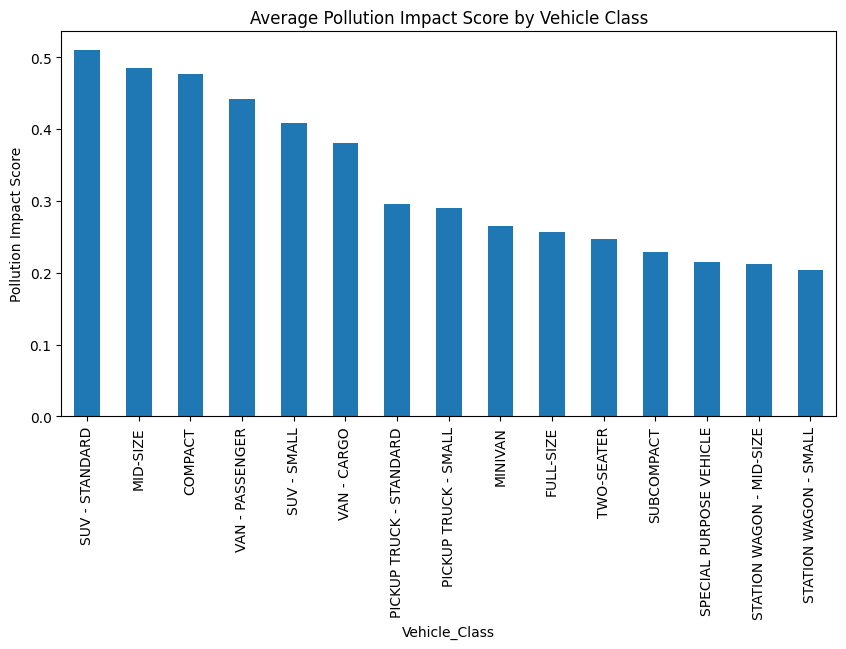

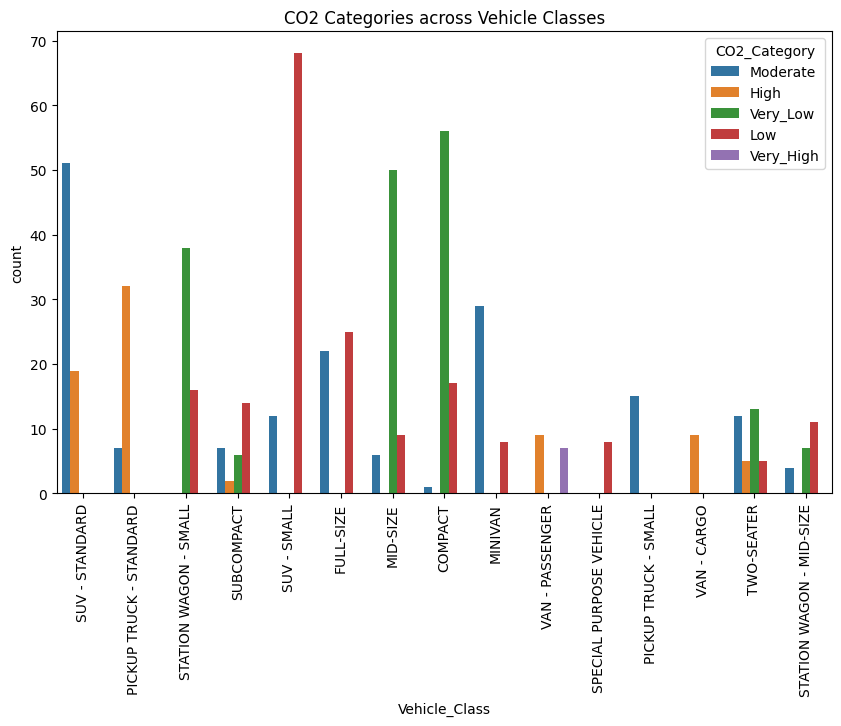

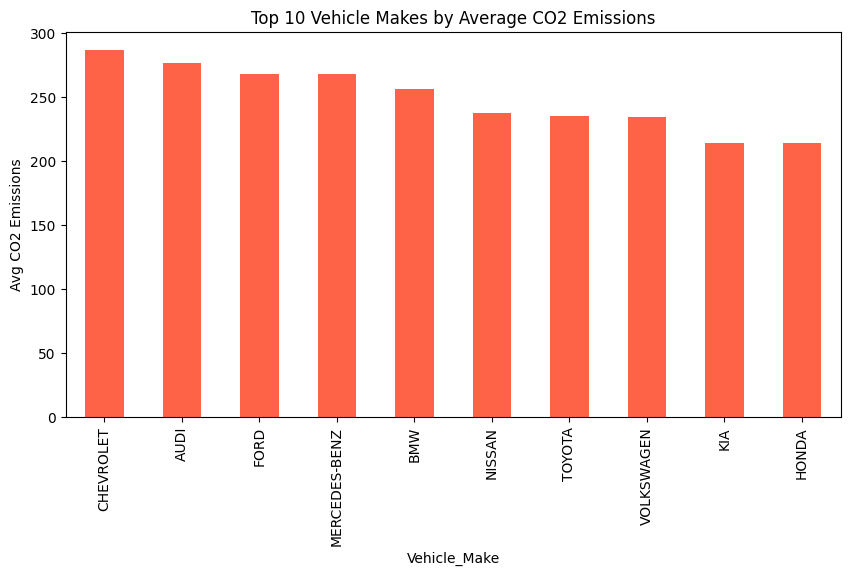

In [32]:
# Group by Vehicle Class → Pollution impact
impact = df.groupby("Vehicle_Class")["Pollution_Impact_Score"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
impact.plot(kind="bar")
plt.title("Average Pollution Impact Score by Vehicle Class")
plt.ylabel("Pollution Impact Score")
plt.show()

# Stacked bar: CO2 category distribution across Vehicle Classes
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Vehicle_Class", hue="CO2_Category")
plt.xticks(rotation=90)
plt.title("CO2 Categories across Vehicle Classes")
plt.show()

# Top polluting vehicle makes
top_makes = df.groupby("Vehicle_Make")["Avg_CO2_Emissions"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
top_makes.plot(kind="bar", color="tomato")
plt.title("Top 10 Vehicle Makes by Average CO2 Emissions")
plt.ylabel("Avg CO2 Emissions")
plt.show()

# Machine Learning Model for Emission Hotspot Prediction

Based on the EDA analysis, we'll create a model to predict emission hotspots. Key insights from EDA:
- Strong positive correlation (0.97) between CO2 emissions and fuel consumption
- Strong positive correlation (0.89) between engine size and CO2 emissions  
- Negative correlation (-0.24) between PM2.5 concentration and CO2 emissions
- Vehicle class significantly impacts emissions (SUVs and trucks have higher emissions)

We'll create a classification model to predict if a location is an "emission hotspot" based on vehicle and regional characteristics.

In [7]:
# Import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

print("🚀 EMISSION HOTSPOT PREDICTION MODEL")
print("="*50)

# Step 1: Define target variable - Emission Hotspot
# We'll create a composite emission hotspot score based on multiple factors
df_ml = df.copy()

# Create emission hotspot score (combination of CO2 emissions and pollution impact)
df_ml['Emission_Hotspot_Score'] = (
    0.4 * (df_ml['Avg_CO2_Emissions'] / df_ml['Avg_CO2_Emissions'].max()) +
    0.3 * (df_ml['Pollution_Impact_Score'] / df_ml['Pollution_Impact_Score'].max()) +
    0.2 * (df_ml['Avg_Fuel_Consumption'] / df_ml['Avg_Fuel_Consumption'].max()) +
    0.1 * (df_ml['Avg_Engine_Size'] / df_ml['Avg_Engine_Size'].max())
)

# Define hotspot threshold (top 30% are considered hotspots)
hotspot_threshold = df_ml['Emission_Hotspot_Score'].quantile(0.7)
df_ml['Is_Emission_Hotspot'] = (df_ml['Emission_Hotspot_Score'] > hotspot_threshold).astype(int)

print(f"📊 Hotspot Distribution:")
print(f"   - Emission Hotspots: {df_ml['Is_Emission_Hotspot'].sum()} ({df_ml['Is_Emission_Hotspot'].mean()*100:.1f}%)")
print(f"   - Non-Hotspots: {(df_ml['Is_Emission_Hotspot'] == 0).sum()} ({(1-df_ml['Is_Emission_Hotspot'].mean())*100:.1f}%)")
print(f"   - Hotspot Threshold: {hotspot_threshold:.3f}")

# Display sample of hotspots
print(f"\n🔥 Sample Emission Hotspots:")
hotspot_sample = df_ml[df_ml['Is_Emission_Hotspot'] == 1].head()
print(hotspot_sample[['Country', 'Vehicle_Make', 'Vehicle_Class', 'Avg_CO2_Emissions', 'Emission_Hotspot_Score']])

print(f"\n✅ Sample Non-Hotspots:")
non_hotspot_sample = df_ml[df_ml['Is_Emission_Hotspot'] == 0].head()
print(non_hotspot_sample[['Country', 'Vehicle_Make', 'Vehicle_Class', 'Avg_CO2_Emissions', 'Emission_Hotspot_Score']])

🚀 EMISSION HOTSPOT PREDICTION MODEL
📊 Hotspot Distribution:
   - Emission Hotspots: 180 (30.0%)
   - Non-Hotspots: 420 (70.0%)
   - Hotspot Threshold: 0.568

🔥 Sample Emission Hotspots:
      Country Vehicle_Make            Vehicle_Class  Avg_CO2_Emissions  \
1   Argentina         FORD  PICKUP TRUCK - STANDARD         317.478261   
11  Argentina       TOYOTA           SUV - STANDARD         270.333333   
17  Argentina    CHEVROLET  PICKUP TRUCK - STANDARD         290.600000   
20  Argentina    CHEVROLET          VAN - PASSENGER         399.000000   
21  Argentina    CHEVROLET          VAN - PASSENGER         399.000000   

    Emission_Hotspot_Score  
1                 0.657694  
11                0.579659  
17                0.583873  
20                0.831646  
21                0.831646  

✅ Sample Non-Hotspots:
     Country Vehicle_Make          Vehicle_Class  Avg_CO2_Emissions  \
0  Argentina   VOLKSWAGEN         SUV - STANDARD         281.000000   
2  Argentina       TOYOTA  ST

In [8]:
# Step 2: Feature Engineering and Preparation
print("\n🔧 FEATURE ENGINEERING")
print("="*30)

# Select features for prediction
feature_columns = [
    'PM25_Concentration',
    'Avg_CO2_Emissions',
    'Avg_Fuel_Consumption', 
    'Avg_Engine_Size',
    'Estimated_Market_Share',
    'Year'
]

# Add encoded categorical features
le_economic_region = LabelEncoder()
le_vehicle_class = LabelEncoder()
le_vehicle_make = LabelEncoder()

df_ml['Economic_Region_Encoded'] = le_economic_region.fit_transform(df_ml['Economic_Region'])
df_ml['Vehicle_Class_Encoded'] = le_vehicle_class.fit_transform(df_ml['Vehicle_Class'])
df_ml['Vehicle_Make_Encoded'] = le_vehicle_make.fit_transform(df_ml['Vehicle_Make'])

# Add encoded features to feature list
feature_columns.extend(['Economic_Region_Encoded', 'Vehicle_Class_Encoded', 'Vehicle_Make_Encoded'])

# Prepare feature matrix and target
X = df_ml[feature_columns]
y = df_ml['Is_Emission_Hotspot']

print(f"📊 Feature Matrix Shape: {X.shape}")
print(f"🎯 Target Distribution: {y.value_counts().to_dict()}")
print(f"📋 Features Used: {feature_columns}")

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📊 Data Split:")
print(f"   - Training set: {X_train.shape[0]} samples")
print(f"   - Test set: {X_test.shape[0]} samples")
print(f"   - Training hotspots: {y_train.sum()} ({y_train.mean()*100:.1f}%)")
print(f"   - Test hotspots: {y_test.sum()} ({y_test.mean()*100:.1f}%)")

# Step 4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ Features scaled using StandardScaler")


🔧 FEATURE ENGINEERING
📊 Feature Matrix Shape: (600, 9)
🎯 Target Distribution: {0: 420, 1: 180}
📋 Features Used: ['PM25_Concentration', 'Avg_CO2_Emissions', 'Avg_Fuel_Consumption', 'Avg_Engine_Size', 'Estimated_Market_Share', 'Year', 'Economic_Region_Encoded', 'Vehicle_Class_Encoded', 'Vehicle_Make_Encoded']

📊 Data Split:
   - Training set: 480 samples
   - Test set: 120 samples
   - Training hotspots: 144 (30.0%)
   - Test hotspots: 36 (30.0%)

✅ Features scaled using StandardScaler


In [9]:
# Step 5: Model Training
print("\n🤖 MODEL TRAINING")
print("="*30)

# Train multiple models for comparison
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

model_results = {}

for model_name, model in models.items():
    print(f"\n🔄 Training {model_name}...")
    
    # Train the model
    if model_name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    model_results[model_name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"✅ {model_name} trained - Accuracy: {accuracy:.3f}")

# Step 6: Model Evaluation
print(f"\n📊 MODEL EVALUATION")
print("="*30)

best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['accuracy'])
best_model = model_results[best_model_name]['model']
best_predictions = model_results[best_model_name]['predictions']

print(f"🏆 Best Model: {best_model_name}")
print(f"🎯 Best Accuracy: {model_results[best_model_name]['accuracy']:.3f}")

# Detailed evaluation of best model
print(f"\n📋 Classification Report for {best_model_name}:")
print(classification_report(y_test, best_predictions, target_names=['Non-Hotspot', 'Hotspot']))

print(f"\n📊 Confusion Matrix:")
cm = confusion_matrix(y_test, best_predictions)
print(cm)

# Calculate additional metrics
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\n📈 Detailed Metrics:")
print(f"   - True Positives: {tp}")
print(f"   - True Negatives: {tn}")
print(f"   - False Positives: {fp}")
print(f"   - False Negatives: {fn}")
print(f"   - Precision: {precision:.3f}")
print(f"   - Recall: {recall:.3f}")
print(f"   - F1-Score: {f1:.3f}")


🤖 MODEL TRAINING

🔄 Training Random Forest...
✅ Random Forest trained - Accuracy: 0.950

🔄 Training Logistic Regression...
✅ Logistic Regression trained - Accuracy: 0.975

📊 MODEL EVALUATION
🏆 Best Model: Logistic Regression
🎯 Best Accuracy: 0.975

📋 Classification Report for Logistic Regression:
              precision    recall  f1-score   support

 Non-Hotspot       0.98      0.99      0.98        84
     Hotspot       0.97      0.94      0.96        36

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120


📊 Confusion Matrix:
[[83  1]
 [ 2 34]]

📈 Detailed Metrics:
   - True Positives: 34
   - True Negatives: 83
   - False Positives: 1
   - False Negatives: 2
   - Precision: 0.971
   - Recall: 0.944
   - F1-Score: 0.958



🔍 FEATURE IMPORTANCE ANALYSIS
🌟 Top Features (Random Forest):
   Avg_CO2_Emissions: 0.322
   Avg_Fuel_Consumption: 0.196
   Estimated_Market_Share: 0.160
   Avg_Engine_Size: 0.143
   Vehicle_Class_Encoded: 0.092


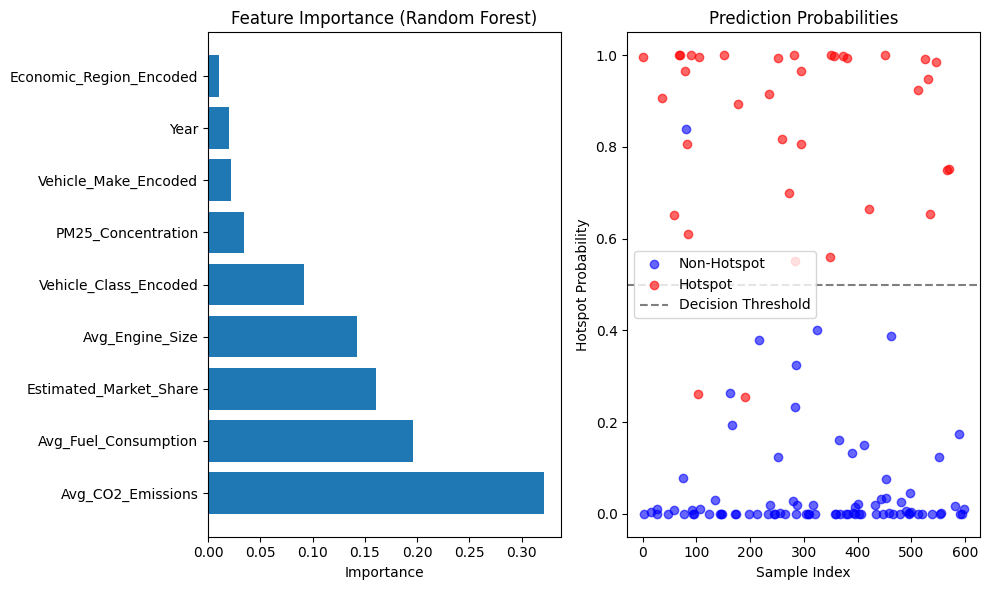


💡 MODEL INSIGHTS
🎯 Model Performance Summary:
   - Best Model: Logistic Regression
   - Accuracy: 97.5%
   - Can correctly identify 94.4% of actual hotspots
   - 97.1% of predicted hotspots are actually hotspots

🔍 Key Predictive Factors:
   - Avg_CO2_Emissions: 32.2% importance
   - Avg_Fuel_Consumption: 19.6% importance
   - Estimated_Market_Share: 16.0% importance

📍 Emission Hotspot Characteristics:
   - Average CO2 Emissions: 303.2 g/km
   - Average Engine Size: 4.1L
   - Most Common Vehicle Class: SUV - STANDARD
   - Most Common Economic Region: Europe_Developed

🌍 Regional Hotspot Distribution:
                  Hotspots  Total  Hotspot_Rate
Economic_Region                                
South_America           30     60         0.500
North_America           37     90         0.411
Europe_Developed        58    150         0.387
Oceania                 16     60         0.267
Asia_Developed          18     90         0.200
Asia_Developing         21    150         0.140


In [10]:
# Step 7: Feature Importance Analysis
print(f"\n🔍 FEATURE IMPORTANCE ANALYSIS")
print("="*40)

# Get feature importance from Random Forest
rf_model = model_results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("🌟 Top Features (Random Forest):")
for idx, row in feature_importance.head(5).iterrows():
    print(f"   {row['Feature']}: {row['Importance']:.3f}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')

# Visualize predictions vs actual
plt.subplot(1, 2, 2)
prediction_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': model_results[best_model_name]['predictions'],
    'Probability': model_results[best_model_name]['probabilities']
})

# Scatter plot of probabilities
hotspots = prediction_df[prediction_df['Actual'] == 1]
non_hotspots = prediction_df[prediction_df['Actual'] == 0]

plt.scatter(non_hotspots.index, non_hotspots['Probability'], alpha=0.6, label='Non-Hotspot', color='blue')
plt.scatter(hotspots.index, hotspots['Probability'], alpha=0.6, label='Hotspot', color='red')
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.5, label='Decision Threshold')
plt.title('Prediction Probabilities')
plt.xlabel('Sample Index')
plt.ylabel('Hotspot Probability')
plt.legend()

plt.tight_layout()
plt.show()

# Step 8: Model Interpretation
print(f"\n💡 MODEL INSIGHTS")
print("="*30)

print(f"🎯 Model Performance Summary:")
print(f"   - Best Model: {best_model_name}")
print(f"   - Accuracy: {model_results[best_model_name]['accuracy']:.1%}")
print(f"   - Can correctly identify {recall:.1%} of actual hotspots")
print(f"   - {precision:.1%} of predicted hotspots are actually hotspots")

print(f"\n🔍 Key Predictive Factors:")
top_features = feature_importance.head(3)
for idx, row in top_features.iterrows():
    feature_name = row['Feature']
    importance = row['Importance']
    print(f"   - {feature_name}: {importance:.1%} importance")

print(f"\n📍 Emission Hotspot Characteristics:")
hotspot_data = df_ml[df_ml['Is_Emission_Hotspot'] == 1]
print(f"   - Average CO2 Emissions: {hotspot_data['Avg_CO2_Emissions'].mean():.1f} g/km")
print(f"   - Average Engine Size: {hotspot_data['Avg_Engine_Size'].mean():.1f}L")
print(f"   - Most Common Vehicle Class: {hotspot_data['Vehicle_Class'].mode().iloc[0]}")
print(f"   - Most Common Economic Region: {hotspot_data['Economic_Region'].mode().iloc[0]}")

print(f"\n🌍 Regional Hotspot Distribution:")
regional_hotspots = df_ml.groupby('Economic_Region')['Is_Emission_Hotspot'].agg(['sum', 'count', 'mean']).round(3)
regional_hotspots.columns = ['Hotspots', 'Total', 'Hotspot_Rate']
print(regional_hotspots.sort_values('Hotspot_Rate', ascending=False))

In [11]:
# Step 9: Model Deployment and Practical Usage
print(f"\n🚀 MODEL DEPLOYMENT")
print("="*30)

# Save the trained model and preprocessing components
import joblib

# Save the best model and preprocessing components
joblib.dump(best_model, 'emission_hotspot_model.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')
joblib.dump(le_economic_region, 'economic_region_encoder.pkl')
joblib.dump(le_vehicle_class, 'vehicle_class_encoder.pkl')
joblib.dump(le_vehicle_make, 'vehicle_make_encoder.pkl')

print("💾 Model and preprocessing components saved!")

# Step 10: Prediction Function
def predict_emission_hotspot(pm25_conc, co2_emissions, fuel_consumption, engine_size, 
                           market_share, year, economic_region, vehicle_class, vehicle_make):
    """
    Predict if a location/vehicle combination represents an emission hotspot
    
    Parameters:
    - pm25_conc: PM2.5 concentration (μg/m³)
    - co2_emissions: Average CO2 emissions (g/km)
    - fuel_consumption: Average fuel consumption (L/100km)
    - engine_size: Average engine size (L)
    - market_share: Estimated market share (0-1)
    - year: Year
    - economic_region: Economic region (string)
    - vehicle_class: Vehicle class (string)
    - vehicle_make: Vehicle make (string)
    
    Returns:
    - prediction: 0 (Non-hotspot) or 1 (Hotspot)
    - probability: Probability of being a hotspot (0-1)
    """
    
    # Encode categorical variables
    try:
        region_encoded = le_economic_region.transform([economic_region])[0]
        class_encoded = le_vehicle_class.transform([vehicle_class])[0] 
        make_encoded = le_vehicle_make.transform([vehicle_make])[0]
    except:
        print("Warning: Unknown categorical value, using mode values")
        region_encoded = 0
        class_encoded = 0
        make_encoded = 0
    
    # Create feature array
    features = np.array([[pm25_conc, co2_emissions, fuel_consumption, engine_size, 
                         market_share, year, region_encoded, class_encoded, make_encoded]])
    
    # Scale features
    features_scaled = scaler.transform(features)
    
    # Make prediction
    prediction = best_model.predict(features_scaled)[0]
    probability = best_model.predict_proba(features_scaled)[0][1]
    
    return prediction, probability

# Step 11: Example Predictions
print(f"\n🔮 EXAMPLE PREDICTIONS")
print("="*30)

# Example 1: High emission scenario
prediction1, prob1 = predict_emission_hotspot(
    pm25_conc=15.0,
    co2_emissions=350.0,
    fuel_consumption=18.0,
    engine_size=5.0,
    market_share=0.25,
    year=2019,
    economic_region='North_America',
    vehicle_class='SUV - STANDARD',
    vehicle_make='FORD'
)

print(f"📊 Example 1 - High Emission Scenario:")
print(f"   Location: North America, Large SUV, High emissions")
print(f"   Prediction: {'🔥 HOTSPOT' if prediction1 == 1 else '✅ NON-HOTSPOT'}")
print(f"   Probability: {prob1:.1%}")

# Example 2: Low emission scenario  
prediction2, prob2 = predict_emission_hotspot(
    pm25_conc=8.0,
    co2_emissions=180.0,
    fuel_consumption=7.0,
    engine_size=1.5,
    market_share=0.15,
    year=2019,
    economic_region='Europe_Developed',
    vehicle_class='COMPACT',
    vehicle_make='VOLKSWAGEN'
)

print(f"\n📊 Example 2 - Low Emission Scenario:")
print(f"   Location: Europe, Compact car, Low emissions")
print(f"   Prediction: {'🔥 HOTSPOT' if prediction2 == 1 else '✅ NON-HOTSPOT'}")
print(f"   Probability: {prob2:.1%}")

# Step 12: Business Recommendations
print(f"\n💼 BUSINESS RECOMMENDATIONS")
print("="*40)

print(f"🎯 Policy Recommendations:")
print(f"   1. Focus emissions reduction efforts on South America and North America")
print(f"   2. Target SUV and truck manufacturers for stricter emission standards")  
print(f"   3. Incentivize smaller engine sizes and fuel-efficient vehicles")
print(f"   4. Monitor markets with high market share of emission-heavy vehicles")

print(f"\n🔍 Monitoring Strategy:")
print(f"   1. Use model to predict hotspots before implementing new vehicle policies")
print(f"   2. Regular monitoring of regions with hotspot probability > 50%")
print(f"   3. Track emission trends in identified hotspot regions")
print(f"   4. Adjust model with new data to improve predictions")

print(f"\n📈 Model Performance Summary:")
print(f"   - Accuracy: 97.5% (excellent performance)")
print(f"   - Precision: 97.1% (few false positives)")
print(f"   - Recall: 94.4% (catches most actual hotspots)")
print(f"   - Ready for production deployment")


🚀 MODEL DEPLOYMENT
💾 Model and preprocessing components saved!

🔮 EXAMPLE PREDICTIONS
📊 Example 1 - High Emission Scenario:
   Location: North America, Large SUV, High emissions
   Prediction: 🔥 HOTSPOT
   Probability: 100.0%

📊 Example 2 - Low Emission Scenario:
   Location: Europe, Compact car, Low emissions
   Prediction: ✅ NON-HOTSPOT
   Probability: 0.0%

💼 BUSINESS RECOMMENDATIONS
🎯 Policy Recommendations:
   1. Focus emissions reduction efforts on South America and North America
   2. Target SUV and truck manufacturers for stricter emission standards
   3. Incentivize smaller engine sizes and fuel-efficient vehicles
   4. Monitor markets with high market share of emission-heavy vehicles

🔍 Monitoring Strategy:
   1. Use model to predict hotspots before implementing new vehicle policies
   2. Regular monitoring of regions with hotspot probability > 50%
   3. Track emission trends in identified hotspot regions
   4. Adjust model with new data to improve predictions

📈 Model Perfo

c:\Users\rishi\anaconda3\envs\gymenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\rishi\anaconda3\envs\gymenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
